# Data Exploration

First, we are going to import all the libraries that we will be using in this notebook to explore the dataset.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np

## Data reading
We are going to read the data in a dataframe of pandas.

In [2]:
Orders = pd.read_excel("superstore_09bda538-16bc-4a44-900e-e9aa17815298.xls", sheet_name="Orders")

Now, we are going to explore the data.

In [3]:
#Info of the dataset
Orders.info()
#Statistic info of the dataset
Orders.describe()
#Head of the dataset
Orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Viz

In order to understand the data and its complexity, we are going to realize some visualization



<Figure size 800x600 with 0 Axes>

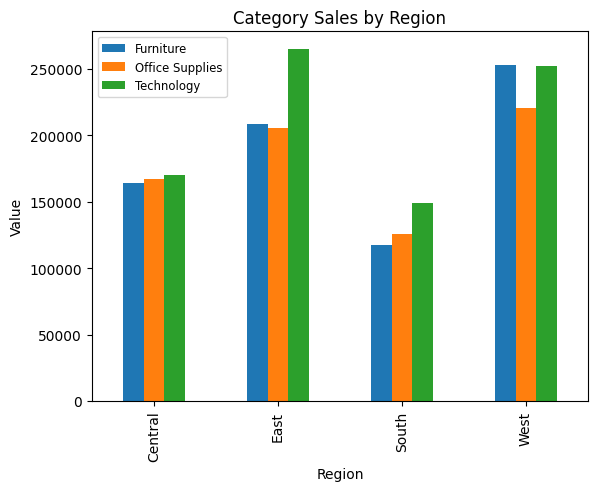

In [4]:
Orders.set_index("Row ID")
#Prepare first dataset
sales_region = Orders.groupby(["Category", "Region"])["Sales"].sum().reset_index()
#Pivot table for create de datviz
pivot_sales_region = sales_region.pivot(index='Region', columns='Category', values='Sales')

# Create the bar plot
plt.figure(figsize=(8,6))

pivot_sales_region.plot(kind='bar')


plt.legend(fontsize = "small")
plt.title('Category Sales by Region')
plt.xlabel('Region')
plt.ylabel('Value')

plt.show()

In the previous plot, it is evident that the category with the highest sales across most regions is "Technology". However, in the **West** region, the category with the highest sales is "Furniture", albeit with slightly less than one thousand sales.

Now, we are interested in the clients who buy more of each product and also want to make a comparison with the most frequent buyers per product and per region.

C:\Users\kenny\AppData\Local\Temp\ipykernel_21996\1629715505.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_10_clients.index, rotation=60)


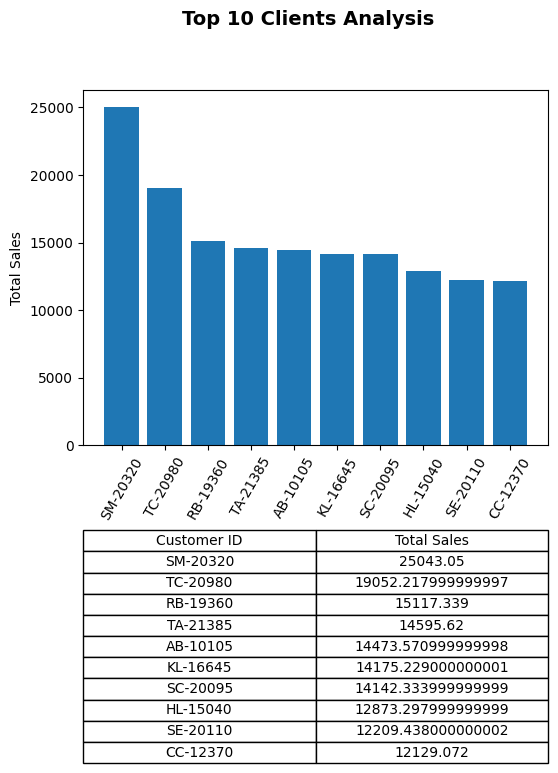

In [5]:
#We creare a new dataframe
selected_columns = ["Customer ID", 'Region', 'Category', 'Sales', 'Quantity']
clients = Orders[selected_columns]
#First we want to know the top 10 clients in all the country
sales_per_client = clients.groupby("Customer ID")["Sales"].sum().sort_values(ascending= False)
top_10_clients = sales_per_client.head(10) 

# Create a grid layout with 2 rows and 1 column
fig = plt.figure(figsize=(6, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Create the plot in the first row
ax1 = plt.subplot(gs[0])
ax1.bar(top_10_clients.index, top_10_clients.values)
ax1.set_ylabel('Total Sales')  # Set y-label
ax1.set_xticklabels(top_10_clients.index, rotation=60)

# Create the table in the second row
ax2 = plt.subplot(gs[1])
table_data = [['Customer ID', 'Total Sales']]
table_data.extend(top_10_clients.reset_index().values.tolist())
table = ax2.table(cellText=table_data, loc='center', cellLoc='center')

# Adjust the table properties
table.scale(1, 1.5)  # Adjust the table size
table.auto_set_font_size(False)  # Disable auto font size adjustment
table.set_fontsize(10)  # Set the font size for the table cells

# Hide the axis labels and ticks for the table
ax2.axis('off')

# Add space between the plot and table
plt.subplots_adjust(hspace=0.6)

# Set the title for the figure
fig.suptitle('Top 10 Clients Analysis', fontsize=14, fontweight='bold')
# Show the plot
plt.show()

In [6]:
# Group the data by 'Region', 'Category', and 'Customer ID'
grouped_data = clients.groupby(['Region', 'Category', 'Customer ID'])

# Compute the sum of sales per region, category, and client
sales_per_client = grouped_data['Sales'].sum().reset_index()

# Group the data by 'Region' and 'Category'
grouped_sales = sales_per_client.groupby(['Region', 'Category'])

# Get the top 3 clients per region per category based on sales
top_clients_per_region_category = grouped_sales.apply(lambda x: x.nlargest(3, 'Sales'))

# Print the result
print(top_clients_per_region_category)


                               Region         Category Customer ID       Sales
Region  Category                                                              
Central Furniture       174   Central        Furniture    LA-16780   3529.5160
                        133   Central        Furniture    HW-14935   3120.0240
                        262   Central        Furniture    RP-19390   2807.8400
        Office Supplies 323   Central  Office Supplies    AB-10105  11318.5320
                        772   Central  Office Supplies    SC-20095   9900.1900
                        347   Central  Office Supplies    AR-10540   5500.0300
        Technology      1135  Central       Technology    TC-20980  17499.9500
                        894   Central       Technology    BM-11140   8303.9280
                        1101  Central       Technology    SB-20290   5579.9400
East    Furniture       1429     East        Furniture    PF-19120   6432.3880
                        1487     East        Furnitu

Now we are going to split the data bases so we can make the plots per region.

<Figure size 800x600 with 0 Axes>

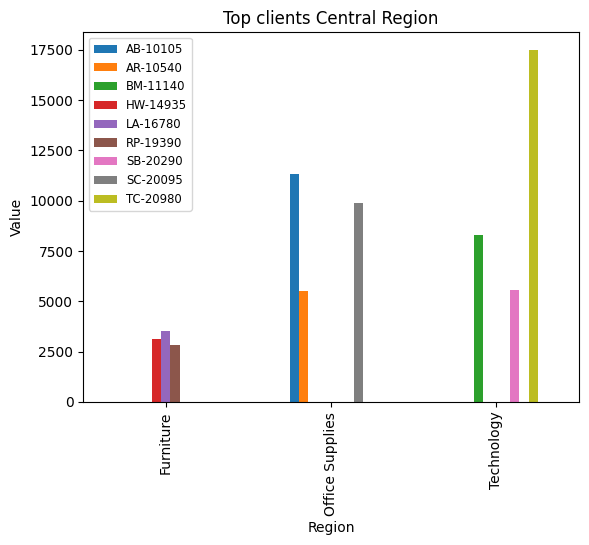

<Figure size 800x600 with 0 Axes>

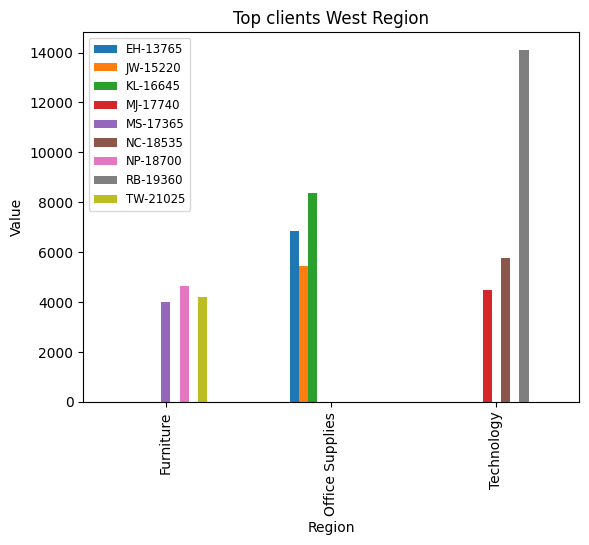

<Figure size 800x600 with 0 Axes>

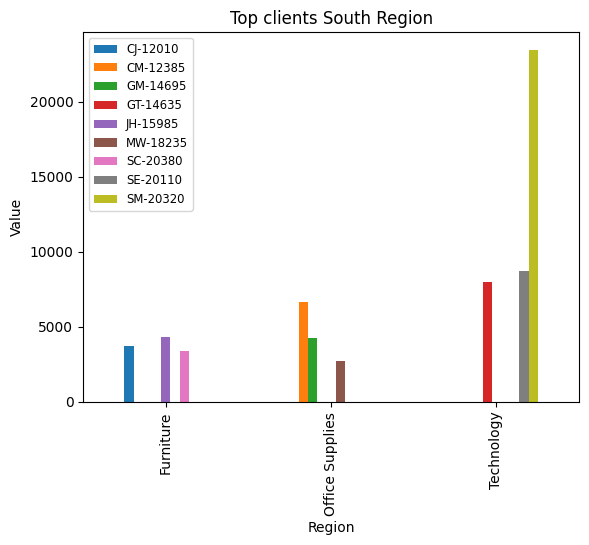

<Figure size 800x600 with 0 Axes>

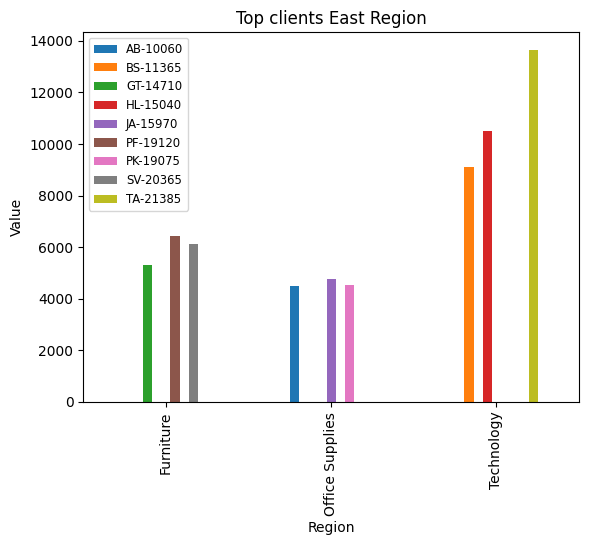

In [18]:
#Creating the new set of dataset per region 
top_sales_central = top_clients_per_region_category.loc["Central"]
top_sales_west = top_clients_per_region_category.loc["West"]
top_sales_south = top_clients_per_region_category.loc["South"]
top_sales_east = top_clients_per_region_category.loc["East"]

#First plot 
#Pivot table for create de datviz
pivot_sales_central = top_sales_central.pivot(index='Category', columns='Customer ID', values='Sales')

# Create the bar plot
plt.figure(figsize=(8,6))

pivot_sales_central.plot(kind='bar')


plt.legend(fontsize = "small")
plt.title('Top clients Central Region')
plt.xlabel('Region')
plt.ylabel('Value')

plt.show()

#Second plot 
#Pivot table for create de datviz
pivot_sales_west = top_sales_west.pivot(index='Category', columns='Customer ID', values='Sales')

# Create the bar plot
plt.figure(figsize=(8,6))

pivot_sales_west.plot(kind='bar')


plt.legend(fontsize = "small")
plt.title('Top clients West Region')
plt.xlabel('Region')
plt.ylabel('Value')

plt.show()

#Third plot 
#Pivot table for create de datviz
pivot_sales_south = top_sales_south.pivot(index='Category', columns='Customer ID', values='Sales')

# Create the bar plot
plt.figure(figsize=(8,6))

pivot_sales_south.plot(kind='bar')


plt.legend(fontsize = "small")
plt.title('Top clients South Region')
plt.xlabel('Region')
plt.ylabel('Value')

plt.show()

#Third plot 
#Pivot table for create de datviz
pivot_sales_east = top_sales_east.pivot(index='Category', columns='Customer ID', values='Sales')

# Create the bar plot
plt.figure(figsize=(8,6))

pivot_sales_east.plot(kind='bar')


plt.legend(fontsize = "small")
plt.title('Top clients East Region')
plt.xlabel('Region')
plt.ylabel('Value')

plt.show()

In [10]:
#Try and error
top_clients_per_region_category.loc["Central"]

Region         Category Customer ID      Sales
Category                                                             
Furniture       174   Central        Furniture    LA-16780   3529.516
                133   Central        Furniture    HW-14935   3120.024
                262   Central        Furniture    RP-19390   2807.840
Office Supplies 323   Central  Office Supplies    AB-10105  11318.532
                772   Central  Office Supplies    SC-20095   9900.190
                347   Central  Office Supplies    AR-10540   5500.030
Technology      1135  Central       Technology    TC-20980  17499.950
                894   Central       Technology    BM-11140   8303.928
                1101  Central       Technology    SB-20290   5579.940

Now it is important to determine in which trimester the highest sales occur

C:\Users\kenny\AppData\Local\Temp\ipykernel_21996\2218261366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_sales['Order Date'] = pd.to_datetime(Date_sales['Order Date'])
C:\Users\kenny\AppData\Local\Temp\ipykernel_21996\2218261366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_sales['Trimester'] = Date_sales['Order Date'].dt.quarter
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

   Trimester  Quantity
0          1      5106
1          2      7918
2          3     10551
3          4     14298


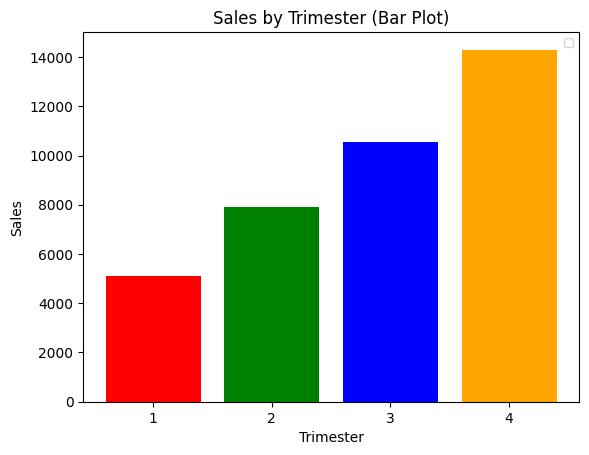

In [43]:
#Create a dataset only with the orderdate and sales
Date_sales = Orders[["Order Date", "Quantity"]]
Date_sales['Order Date'] = pd.to_datetime(Date_sales['Order Date'])

# Extract the trimester from the 'Order date' column and create a new column 'Trimester'
Date_sales['Trimester'] = Date_sales['Order Date'].dt.quarter

# Group the data by 'Trimester' and calculate the sum of 'Sales' for each trimester
trimester_sales = Date_sales.groupby('Trimester')['Quantity'].sum().reset_index()

# Print the resulting dataset
print(trimester_sales)

# Sort the DataFrame by 'Trimester' column
trimester_sales = trimester_sales.sort_values('Trimester')

# Create an array of colors for each bar
colors = ['red', 'green', 'blue', "orange"]

# Set the x-axis positions of the bars
x = np.arange(len(trimester_sales))

# Plot the data as a bar plot with different colors for each bar
plt.bar(x, trimester_sales['Quantity'], color=colors)

# Set the x-axis tick positions and labels
plt.xticks(x, trimester_sales['Trimester'])

# Set the x-axis and y-axis labels
plt.xlabel('Trimester')
plt.ylabel('Sales')
plt.legend(fontsize = "small")

# Set the title of the plot
plt.title('Sales by Trimester (Bar Plot)')

# Show the plot
plt.show()




The trimester with more sales is the fourth one.

In [28]:
#Check variables
Date_sales = Orders[["Order Date", "Sales"]]
print(Date_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Sales       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 156.3 KB
None


In [21]:
pip install seaborn


                                              0.0/293.3 kB ? eta -:--:--
     ---------------                        122.9/293.3 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 4.5 MB/s eta 0:00:00
